In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset


In [8]:
#Loading the data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes= load_dataset();

y= [1], it's a 'cat' picture


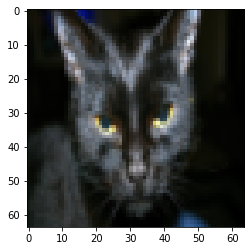

In [28]:
#example of a picture
index= 25
#print(train_set_x_orig[index]) # this is the pixel data
plt.imshow(train_set_x_orig[index]) # this is the picture
print("y= " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8")+ "' picture");


In [17]:
# fIND THE VALUES FOR M_TRAIN (NUMBER TRAINING EXAMPLES)
#m_test (number of test exmaples)
#num_px (= height= width of training image)


#finds the vector dimensions to eliminate potential bugs in the future

m_train = train_set_x_orig.shape[0];
m_test= test_set_x_orig.shape[0];
num_px = train_set_x_orig.shape[1]


print("Number of training exmaples: m_train = " +str(m_train))
print("Number of testing exmaples: m_test = " +str(m_test))
print("Height/Width of each image: num_px = " +str(num_px))
print("Each image is of size: (" + str(num_px) + ", "+ str(num_px) + ", 3)")
print("train_set_x_shape:" + str(train_set_x_orig.shape))
print("test_set_x_shape:" + str(test_set_x_orig.shape))
print("train_set_y_shape:" + str(train_set_y.shape))
print("test_set_y_shape:" + str(test_set_y.shape))

Number of training exmaples: m_train = 209
Number of testing exmaples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x_shape:(209, 64, 64, 3)
test_set_x_shape:(50, 64, 64, 3)
train_set_y_shape:(1, 209)
test_set_y_shape:(1, 50)


In [19]:
# For convenience, the vectoir should be shaped from (num_px,num_px,3) into (num_px * num_px *3,1) this puts everything into one column
#Reshapes the training and test data sets so that images of size (num_px,num_px,3) are flattened into a single vector

#X_flatten=X.reshape(X.shape[0], -1).T #X.T is the transpose of X

In [20]:
#Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T


print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y_flatten shape: " + str(test_set_y.shape))
print("sanity check after reshaping: " +str(str(train_set_x_flatten[0:5,0])))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y_flatten shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [22]:
# color images, RGB must be specified for each pixel ,so the pixel value is a vector of three number ranging from 0 to 255
#One step is standardizing your dataset so you subtract the mean of the whole numpy array from each example then divide by the stf
#FOR PICTURE DATASETS IT'S EAST TO DIVIDE EVERY ROW OF THE DATASET BY 255




#standardize the dataset
train_set_x= train_set_x_flatten /255;
test_set_x= test_set_x_flatten / 255;

In [26]:
print(train_set_x[1]) #visualizing the standardized pixels for image number 1

[0.12156863 0.75294118 0.27843137 0.08627451 0.03529412 0.30980392
 0.22352941 0.08627451 0.26666667 0.18431373 0.70588235 0.02352941
 0.6        0.0627451  0.29411765 0.76078431 0.99607843 0.85490196
 0.78431373 0.00784314 0.09019608 0.25098039 0.69803922 0.75686275
 0.40784314 0.05882353 0.45490196 0.14117647 0.09803922 0.70980392
 0.11372549 0.74509804 0.91764706 0.40784314 0.62352941 0.13333333
 0.15294118 0.6745098  0.11764706 0.40784314 0.65098039 0.02352941
 0.12941176 1.         0.41176471 0.         0.23529412 0.18823529
 0.15294118 0.15294118 0.65882353 0.56078431 0.3254902  0.1254902
 0.04705882 1.         0.12156863 0.53333333 0.28235294 0.16862745
 0.25882353 0.46666667 0.50196078 0.50196078 0.16862745 0.37647059
 0.90588235 0.27058824 0.5254902  0.42745098 0.0627451  0.01960784
 0.03529412 0.32941176 0.4        0.43529412 0.1254902  0.0627451
 0.19215686 0.08235294 0.44313725 0.7372549  0.1372549  0.99215686
 0.47843137 0.16862745 0.1254902  0.19215686 0.50196078 0.160784

In [29]:
#Steps we've done so far are:
#1. Figure out the dimensions of the shapes of the problem
#2. reshape the datasets such that each example is now a vector of size( num_px *num_px*3,1)
#3. Standardize the data


In [33]:
#Logistic regression is a simple neural network
"""
Each pixel can be seen as a node that contributes to the final probablity that the image is a cat

"""

'\nEach pixel can be seen as a node that contributes to the final probablity that the image is a cat\n\n'

In [ ]:
"""
STEPS FOR BUILDING A NN

1. Define the model structure( such as number of input features)
2. Initialize the models parameters
3. Loop
 calculate current loss (forward propogation)
 calculate current gradient (backward propogation)
 update parameters (gradient descent)
 
"""

In [31]:
#Make some helper functions to be called later4

#Sigmoid function

def sigmoid(z):
    """
    compute the sigmoid of z
    
    Arguments:
    z-- a scalar or numpy array oif any size
    
    Return:
    s-- sigmoid (z)
    
    
    """
    
    
    s=1/ (1+ np.exp(-z));
    
    return s;

In [32]:
print("sigmoid([0, 2]) = " +str(sigmoid(np.array([0,2])))) testing out sigmoid function

sigmoid([0, 2]) = [0.5        0.88079708]


In [34]:
#INitializing paramters


def initialize_with_zeros(dim):
    """
    this function creates a vector of zeros of shape (dim, 1) for w and intializes b to 0
    
    Arguments:
    dim - - size of the w vector we want (or number of parameters in this case)
    
    REturns:
    w -- intialized vector of shape (dim,1)
    b -- intialized scalar (corresponds to the bias)
        
    """
    
    w= np.zeros((dim,1));
    b=0;
    
    assert(w.shape == (dim,1));
    assert(isinstance(b, float) or isinstance(b, int));
    
    return w, b;

In [37]:
dim = 2;
w,b = initialize_with_zeros(dim);
print(" w= " +str(w));
print("b= " + str(b));

#For image inputs, w will be of shape(numpx*numpx*3,1)

 w= [[0.]
 [0.]]
b= 0


In [40]:
# Forward and Backward propgation

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w -- weights, a numpy array of size (num_px*num_px*3,1)
    b -- bias, a scalar
    X -- data of size (num_px*num_px*3, number of examples)
    Y --  true "label" vector (contraining 0 if non-cat, 1 if cat) of size (1, number of examples)
    
    return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus the same shape as w
    db -- gradient of the loss with respect to b, thus the same shape as b
    
    
    """
    
    m = X.shape[1]
    
    #Forward propagation
    a =  sigmoid(np.dot(w.T,X) +b) #the numpy way of saying W.T*X +b
    cost = -1/m*(np.dot(Y, np.log(a).T)+ np.dot(1-Y, np.log(1-a).T));
    # End Forward Propagation
    
    
    #Backward Propagation (to find gradients)
    dw= 1/m*np.dot(X, (a-Y).T);
    db= 1/m * np.sum(a-Y);
    #ends backward propagation
    
    assert(dw.shape == w.shape)
    assert(db.dtype ==  float);
    cost=np.squeeze(cost);
    assert(cost.shape ==());
    
    grads = {"dw": dw,
            "db": db};
    
    return grads, cost

In [41]:
import numpy as np;
w,b,X,Y = np.array([[1.],[2.]]),2., np.array([[1.,2.,-1],[3.,4.,-3.2]]), np.array([[1,0,1]]);
grads, cost = propagate(w,b, X, Y);
print("dw= " +str(grads["dw"]));
print("db = " +str(grads["db"]));
print("cost = " +str(cost));

dw= [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [46]:
# the parameters have been initialized, Gradient descent can be computed
#Now we want to update the parameters using gradient descent
# optimization

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    this function optimizes w and b by running a gradient descent algorithm
    
    
    Arguments:
    w -- weights, a numpy array of size (num_px*num_px*3,1)
    b -- bias, a scalar
    X --  data of shape (num_px*num_px*3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    numb_iterations --  number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- a dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    1) Calculate the cost and gradient for the current parameters. Use Propagate().
    2)Update the paramaeters using gradient descent rule for w and b.
    """
    costs = []
    
    for i in range(num_iterations):
        
        #Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)
        
        #retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        
        #update rule
        w -= learning_rate * dw;
        b -= learning_rate * db;
        
        #Record the costs
        if i%100 == 0:
            costs.append(cost)
            
            #print every 100 training examples
            if print_cost and i % 100 == 0:
                print("Cost after iteration %i: %f" %(i,cost))
                
    params = {"w": w,
              "b": b}
    grads =  {"dw": dw,
              "db": db}
    
    return params, grads, costs
    

In [49]:
params, grads, costs = optimize(w,b,X,Y, num_iterations = 100, learning_rate = 0.009, print_cost = False);
print("w= " + str(params["w"]))
print("b= " + str(params["b"]))
print("dw= " + str(grads["dw"]))
print("db= " + str(grads["db"]))

w= [[-0.23898308]
 [-0.55175078]]
b= 2.0273638929728355
dw= [[0.0779727 ]
 [0.00737707]]
db= -0.04751525979265005


In [50]:
# computing predictions
#1. calculate Y= A= sigmoid(W.T*x+b)
#convert entries of a into 0 if activation is less than 0.5 or 1 of activation is greater than 0.5, store the predictions 
# in a vector y_prediction


In [60]:
# predict function
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w,b)
    
    Arguments:
    w --  weights, a numpy array of size (num_px*num_px*3,1)
    b -- bias, a scalar
    X -- data of size (num_px*num_px*3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    
    '''
    
    m=X.shape[1]
    Y_prediction= np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    
    #compute vector "A" predicting the probabilities of a cat being present in the picture
    A=sigmoid(np.dot(w.T,X) +b);
    
    
    
    for i in range(A.shape[1]):
        
        #convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] > 0.5:
            Y_prediction[0,i] =1;
            
        else:
            Y_prediction[0,i] = 0;
            
    assert(Y_prediction.shape == (1,m));
    
    return Y_prediction;

In [61]:
w = np.array([[0.1124579],[0.23106775]])
b = -.03
X=np.array([[1.,-1.1,-3.2], [1.2,2.,0.1]]);
print("predictions = " +str(predict(w, b, X)));


predictions = [[1. 1. 0.]]


In [62]:
"""
Functions implemented so far
initialize (w,b)
optimize the loss iteratively to learn parameters (w,b)
computing the cost and its gradient
updating the parameters using gradient descent
use the learned (w,b) to predict the labels for a given set of examples

"""

'\nFunctions implemented so far\ninitialize (w,b)\noptimize the loss iteratively to learn parameters (w,b)\ncomputing the cost and its gradient\nupdating the parameters using gradient descent\nuse the learned (w,b) to predict the labels for a given set of examples\n\n'

In [73]:
#Merging All functions into a MODEL

def model(X_train, Y_train, X_test, Y_test, num_iterations =2000, learning_rate =0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the functions you've implemented previously
    
    Arguments:
    x_train --  training set represented by a numpy array olf shape (num_px*num_px*3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test --  tst set represented by a numpy array of shape (num_px*num_px*3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- set to true to print the cost every 100 iteration
    
    
    returns :
    d -- dictionary containing information about the model
    
    """
    
    #Initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0]);
    
    #gradient descent
    params, grads, costs, = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost);
    
    #retrieve parameters w and b from dictionary "parameters"
    w = params["w"]
    b = params["b"]
    
    #predict test/train set examples
    Y_prediction_train = predict(w, b, X_train);
    Y_prediction_test = predict(w, b, X_test);
    
    
    #print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    
    d = {"costs": costs,
         "Y_prediction_train": Y_prediction_train,
         "Y_prediction_test": Y_prediction_test,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    return d

In [74]:
d= model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True);

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "cat" Picture


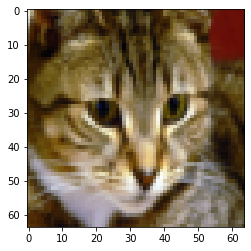

In [77]:
#examples of predictions of the test set
index=15;
plt.imshow(test_set_x[:, index].reshape(num_px, num_px, 3));
print("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") + "\" Picture");


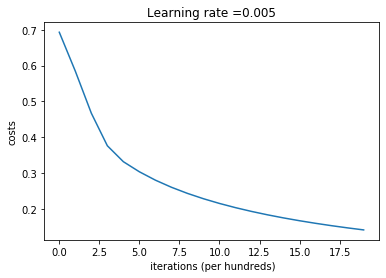

In [78]:
#Ploit the cost function and the gradients

#PLot the learning Curves

costs= np.squeeze(d['costs']);
plt.plot(costs);
plt.ylabel('costs')
plt.xlabel(' iterations (per hundreds)');
plt.title("Learning rate =" + str(d["learning_rate"]));
plt.show();

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



NameError: name 'show' is not defined

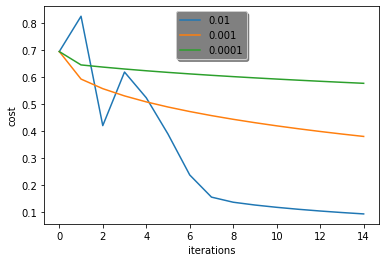

In [80]:
learning_rates = [0.01, 0.001, 0.0001];
models = {};
for i in learning_rates:
    print("learning rate is: " + str(i));
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost= False);
    print('\n' + "-------------------------------------------------------" + '\n')
    
for i in learning_rates:
        plt.plot(np.squeeze(models[str(i)]["costs"]), label = str(models[str(i)]["learning_rate"]));
        
plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow = True);
frame= legend.get_frame();
frame.set_facecolor('0.50');
plt,show()

In [84]:
#Test with your own picture
my_image = "isacatornot.jpg";

#preprcoess image to fit algorithm
fname= "images/" + my_image;
image= np.array(ndimage.imread(fname, flatten=False));

my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T;
my_predicted_image = predict(d["w"], d["b"], my_image);


plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture. ");

AttributeError: module 'scipy.ndimage' has no attribute 'imread'